<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230828_teamproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!sudo apt-get install - y fonts-nanum
!sudo fc-cache -fv
!rm -/ .cache/matplotlib -rf

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package y
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ifood_df.csv')

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
from imblearn.over_sampling import SMOTE # imbalance learning
from collections import Counter

In [ ]:
# 캠페인 수락 여부로 범주화
def categorize_cmp(cmp):
  if cmp == 0:
    return 0
  else:
    return 1

df['AcceptedCmp01'] = df['AcceptedCmpOverall'].apply(categorize_cmp)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmp01
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,1,0,0,1094,847,0,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,0,1,436,428,1,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,1217,1193,1,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,1,0,782,721,0,0


In [ ]:
Counter(df['AcceptedCmp01'])

Counter({0: 1747, 1: 458})

In [ ]:
X = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
Y = df['AcceptedCmp01']

print(X.head())
print('---------------------------')
print(Y.head())

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases
0                8                   10                  4
1                1                    1                  2
2                8                    2                 10
3                2                    0                  4
4                5                    3                  6
---------------------------
0    0
1    0
2    0
3    0
4    0
Name: AcceptedCmp01, dtype: int64


In [ ]:
X.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2205.000000,2205.000000,2205.000000
mean,4.100680,2.645351,5.823583
std,2.737424,2.798647,3.241796
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#train, test를 split 하는 과정. random_state 는 그냥 0으로 넣으면 됨. train:test = 7:3

print(X_train.head())
print('----------------------------------')
print(X_test.head())
print('----------------------------------')
print(Y_train.head())
print('----------------------------------')
print(Y_test.head())

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases
684                 4                    1                  4
785                 7                    1                  7
1979                2                    0                  3
298                 6                    6                 10
52                  5                    5                 10
----------------------------------
      NumWebPurchases  NumCatalogPurchases  NumStorePurchases
1747                2                    7                  7
200                 7                    1                  8
333                 6                    7                  9
2042                6                    2                  8
206                11                    4                 11
----------------------------------
684     0
785     0
1979    0
298     0
52      0
Name: AcceptedCmp01, dtype: int64
----------------------------------
1747    0
200     0
333     0
2042    0
206     0
Name: AcceptedCmp

In [ ]:
# X 변수들에 scale : 웹, 카탈로그, 스토어
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2
0,-0.036788,-0.588043,-0.562650
1,1.059382,-0.588043,0.362973
2,-0.767567,-0.945440,-0.871191
3,0.693992,1.198940,1.288596
4,0.328602,0.841543,1.288596


In [ ]:
X_train_df.describe()

,0,1,2
count,1543.000000,1543.000000,1543.000000
mean,-0.000320,-0.001107,0.012440
std,1.008403,1.008677,1.009692
min,-1.498347,-0.945440,-1.796814
25%,-0.767567,-0.945440,-0.871191
50%,-0.036788,-0.230646,-0.254109
75%,0.693992,0.484147,0.671514
max,8.367179,9.061664,2.214218


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df.head()

,0,1,2
0,-0.767567,1.556336,0.362973
1,1.059382,-0.588043,0.671514
2,0.693992,1.556336,0.980055
3,0.693992,-0.230646,0.671514
4,2.520941,0.484147,1.597137


In [ ]:
X_test_df.describe()

,0,1,2
count,662.000000,662.000000,662.000000
mean,0.000745,0.002579,-0.028995
std,0.981660,0.980998,0.977948
min,-1.498347,-0.945440,-1.796814
25%,-0.767567,-0.945440,-0.871191
50%,-0.219482,-0.230646,-0.254109
75%,0.693992,0.484147,0.671514
max,2.520941,2.985923,2.214218


In [ ]:
Y.describe()

count    2205.00000
mean        0.20771
std         0.40576
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: AcceptedCmp01, dtype: float64

In [ ]:
Y_train_df = pd.DataFrame(Y_train)
Y_train_df.describe()

,AcceptedCmp01
count,1543.000000
mean,0.206092
std,0.404628
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
smote = SMOTE(random_state = 0)

In [ ]:
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train)
# 현재 Y의 값이 불균형해서 oversampling 해줘야되는데, Y를 더 배정할 때 X도 함께 뽑히기 때문에(같은 인덱스의 행이 뽑힘) smote를 할 때, X_train과 Y_train 을 같이 넣는다.

In [ ]:
X_train_df= pd.DataFrame(X_train_over)
X_train_df.describe()

,0,1,2
count,2450.000000,2450.000000,2450.000000
mean,0.147090,0.265148,0.152192
std,0.990688,1.071795,1.023867
min,-1.498347,-0.945440,-1.796814
25%,-0.767567,-0.588043,-0.871191
50%,-0.036788,0.126750,0.054432
75%,0.693992,1.094439,0.980055
max,8.367179,9.061664,2.214218


In [ ]:
Y_train_df= pd.DataFrame(Y_train_over)
Y_train_df.describe() # 이제 이탈여부의 mean 이 50:50비율로 맞춰짐

,AcceptedCmp01
count,2450.000000
mean,0.500000
std,0.500102
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
Counter(Y_train_over)

Counter({0: 1225, 1: 1225})

# 로지스틱 회귀

In [ ]:
#from scipy.optimize import lbfgsb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#logit_model = LogisticRegression(C = 1, random_state = 0, solver = "lbfgs")
#logit_m = logit_model.fit(X_train_over, Y_train_over)
#logit_m

logit_model = LogisticRegression(C = 1, random_state = 0)
logit_m = logit_model.fit(X_train_over, Y_train_over)
logit_m

LogisticRegression(C=1, random_state=0)

In [ ]:
Y_pred_logit = logit_model.predict(X_test)

In [ ]:
cr_logit = classification_report(Y_test, Y_pred_logit)
print(cr_logit)

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       522
           1       0.34      0.59      0.43       140

    accuracy                           0.67       662
   macro avg       0.60      0.64      0.60       662
weighted avg       0.75      0.67      0.69       662



In [ ]:
logit_model.coef_

array([[ 0.2686666 ,  0.86006574, -0.06817283]])

In [ ]:
logit_coef = pd.DataFrame(logit_model.coef_, columns = ['웹', '카탈로그', '스토어'] , index = ['베타값'])
logit_coef

,웹,카탈로그,스토어
베타값,0.268667,0.860066,-0.068173


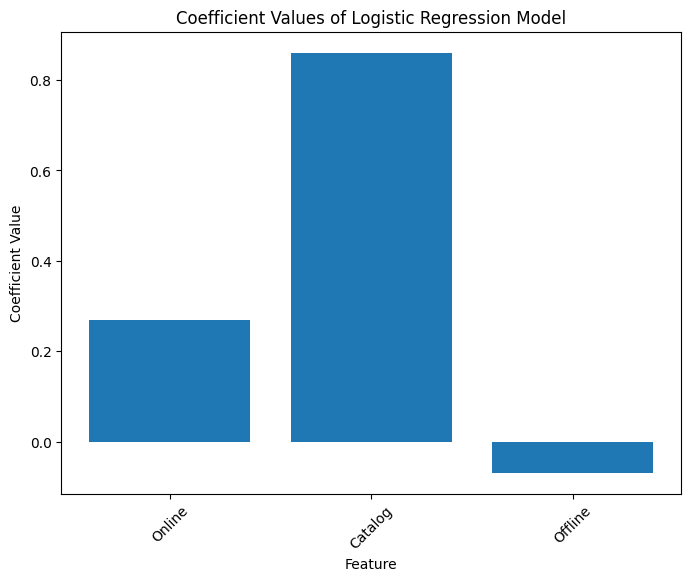

In [ ]:
# 로지스틱 회귀 모델의 계수 가져오기
coefficients = logit_m.coef_[0]

# 계수 값과 해당 피처 이름 연결
feature_names = ['Online', 'Catalog', 'Offline']  # 피처 이름은 실제 데이터에 맞게 수정해주세요

# 계수 값을 막대그래프로 시각화
plt.figure(figsize=(8, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values of Logistic Regression Model')
plt.xticks(rotation=45)
plt.show()


K-NN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn_model = KNeighborsClassifier()

In [ ]:
kn_model.fit(X_train_over, Y_train_over)

KNeighborsClassifier()

In [ ]:
Y_pred_kn = kn_model.predict(X_test)

In [ ]:
cr_kn = classification_report(Y_test, Y_pred_kn)
print(cr_kn)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       522
           1       0.36      0.54      0.43       140

    accuracy                           0.70       662
   macro avg       0.61      0.64      0.61       662
weighted avg       0.75      0.70      0.72       662



### Decision Tree 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train_over, Y_train_over)

DecisionTreeClassifier()

In [ ]:
Y_pred_dt = dt_model.predict(X_test)

In [ ]:
print(Y_pred_dt)

[0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 1 1 0 

In [ ]:
cr_dt = classification_report(Y_test, Y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       522
           1       0.39      0.38      0.38       140

    accuracy                           0.74       662
   macro avg       0.61      0.61      0.61       662
weighted avg       0.74      0.74      0.74       662



In [ ]:
# 변수 중요도 feature importance

feature_name = X.columns
feature_importance = dt_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True) #feature_importance 가 높은 순서로 sort (reverse = True 면 내림차순)

[(0.45704905502083804, 'NumCatalogPurchases'),
 (0.30791452898114885, 'NumStorePurchases'),
 (0.23503641599801317, 'NumWebPurchases')]

랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 500)

In [ ]:
rf_model.fit(X_train_over, Y_train_over)

RandomForestClassifier(n_estimators=500)

In [ ]:
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
print(Y_pred_rf)

[0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 

In [ ]:
cr_rf = classification_report(Y_test, Y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       522
           1       0.42      0.43      0.42       140

    accuracy                           0.75       662
   macro avg       0.63      0.63      0.63       662
weighted avg       0.76      0.75      0.75       662



In [ ]:
# 변수 중요도 feature importance

feature_name = X.columns
feature_importance = rf_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True) #feature_importance 가 높은 순서로 sort (reverse = True 면 내림차순)

[(0.38810345785415296, 'NumCatalogPurchases'),
 (0.3404325842600815, 'NumStorePurchases'),
 (0.2714639578857656, 'NumWebPurchases')]

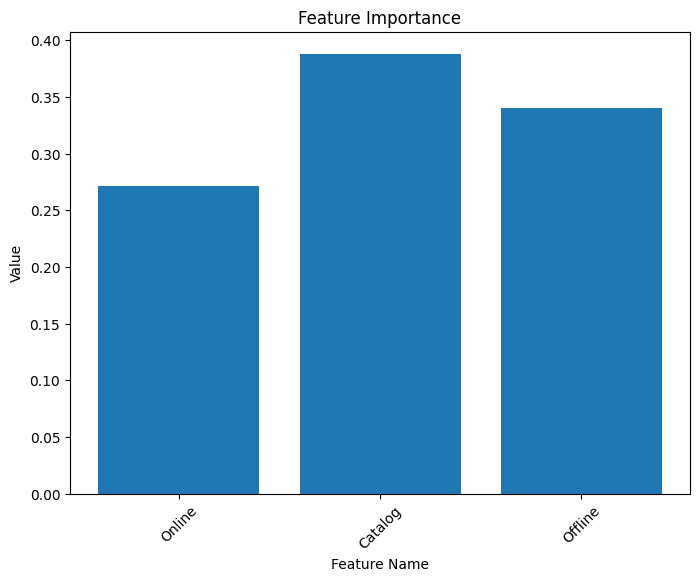

In [ ]:
# 변수 중요도 가져오기
feature_importance = rf_model.feature_importances_
feature_importance

# 계수 값과 해당 피처 이름 연결
feature_name = ['Online', 'Catalog', 'Offline'] #처 이름은 실제 데이터에 맞게 수정해주세요
#feature_importance

# 계수 값을 막대그래프로 시각화
plt.figure(figsize=(8, 6))
plt.bar(feature_name, feature_importance)
plt.xlabel('Feature Name')
plt.ylabel('Value')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmp01
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,1,0,0,1094,847,0,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,0,1,436,428,1,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,1217,1193,1,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,1,0,782,721,0,0


In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'AcceptedCmp01'],
      dtype='object')

In [ ]:


# 아날로그 카탈로그 비용
# 제작비 : x원
# 인쇄비  : 1,048,800원 (약 100만원 )
# 배포 비용 : 2,920,000원 (약 200만원 )
# 인건비 : CS


# 디지털 카탈로그 비용
# 제작비 : x원
# 인쇄비 : 0원
# 배포 비용 : 16,000원 (건 당 8원)
# 인권비 : 챗봇으로 대체


16000

In [ ]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'AcceptedCmp01'],
      dtype='object')

In [ ]:
# Catalog purchase
c_purchase = df.groupby('NumCatalogPurchases').mean().sort_values(by='NumCatalogPurchases').head(10)
c_purchase

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmp01
NumCatalogPurchases,,,,,,,,,,,,,,,,,,,,,
0,31976.211909,0.842382,0.430823,47.788091,20.014011,3.169877,13.176883,4.488616,3.490368,9.028021,...,0.017513,0.106830,0.057793,0.499124,0.152364,0.183888,44.339755,35.311734,0.040280,0.036778
1,40146.516327,0.638776,0.569388,48.661224,107.297959,7.859184,44.897959,12.540816,8.497959,27.665306,...,0.034694,0.108163,0.032653,0.487755,0.181633,0.189796,181.093878,153.428571,0.142857,0.138776
2,54216.883212,0.375912,0.744526,50.978102,318.051095,26.945255,125.025547,32.094891,25.923358,51.759124,...,0.029197,0.065693,0.018248,0.489051,0.164234,0.262774,528.040146,476.281022,0.193431,0.167883
3,64390.928571,0.192308,0.675824,47.609890,522.895604,38.763736,215.175824,55.554945,38.104396,61.763736,...,0.054945,0.065934,0.000000,0.527473,0.159341,0.247253,870.494505,808.730769,0.395604,0.291209
4,67617.657459,0.110497,0.475138,47.790055,587.320442,50.911602,276.110497,62.464088,44.353591,70.895028,...,0.049724,0.060773,0.000000,0.524862,0.193370,0.220994,1021.160221,950.265193,0.513812,0.314917
5,68652.284672,0.102190,0.481752,52.072993,589.846715,46.532847,356.138686,73.226277,52.058394,77.131387,...,0.051095,0.051095,0.000000,0.518248,0.167883,0.262774,1117.802920,1040.671533,0.547445,0.394161
6,74262.937008,0.039370,0.370079,45.692913,649.645669,62.346457,448.779528,81.393701,64.763780,77.968504,...,0.047244,0.094488,0.000000,0.496063,0.188976,0.220472,1306.929134,1228.960630,0.535433,0.354331
7,76627.329114,0.012658,0.240506,55.468354,634.329114,62.886076,460.455696,112.784810,78.658228,84.316456,...,0.025316,0.151899,0.000000,0.556962,0.164557,0.126582,1349.113924,1264.797468,0.936709,0.506329
8,71385.727273,0.018182,0.290909,50.745455,666.054545,59.618182,392.327273,101.854545,62.145455,69.145455,...,0.036364,0.054545,0.000000,0.545455,0.145455,0.254545,1282.000000,1212.854545,0.781818,0.454545
